With the upcoming Diwali season, there is a need to develop a comprehensive marketing strategy to maximize sales and optimize inventory management for a retail business. Based on historical sales data, the goal is to identify key regional trends, zone-wise strategies, product focus areas, insights from product IDs, order frequency tactics, and targeted demographic segments. The objective is to leverage this information to tailor marketing efforts, inventory planning, and promotional activities effectively, ultimately driving higher sales during the Diwali period.

### **Step 1: Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

<code>pip install mysql.connector.python</code>

In [33]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Importing the necessary libraries to establish a connection with the MySQL server, enabling exploratory data analysis (EDA) to gain insights from the dataset.

In [34]:
Conn = mysql.connector.connect(
  host="localhost",               #hostname
  user="root",                   # the user who has privilege to the db
  passwd="Sameer@786",               #password for user
  database="eda_practice",               #database name
)

<pre><code>#Create a cursor
cursor = conn.cursor()

#Example query
query = "SELECT * FROM your_table;"
cursor.execute(query)

#Fetch the result
result = cursor.fetchall()</code></pre>

### **Step 2: Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [35]:
query = "select * from diwali;"

df = pd.read_sql(query,Conn)
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11234,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11235,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11236,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11237,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [36]:
df.shape

(11239, 13)

Analyzing the Data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 11239 observations and 15 variables in our dataset

 
head() will display the top 5 observations of the dataset

In [37]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


**tail()** will display the last 5 observations of the dataset

In [38]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11234,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11235,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11236,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11237,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206
11238,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11239 entries, 0 to 11238
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


Data Overview:
- DataFrame with 11251 entries, 15 columns, and 1.3+ MB memory usage.

Key Columns:
- User_ID, Cust_name, Product_ID, Gender, Age, Marital_Status, State, Zone, Occupation, Product_Category, Orders, and Amount.

Data Types:
- Integer for User_ID, Age, Marital_Status, and Orders.
- Float for Amount, Status, and unnamed1.
- Object for categorical columns.

Missing Values:
- 12 missing values in the 'Amount' column.

Cleanup Needed:
- Address missing values in 'Amount'.
- Evaluate and potentially remove 'Status' and 'unnamed1' columns.

Exploratory Analysis:
- Visualize data distributions and explore relationships between variables.
- Consider feature engineering based on EDA insights.

**Check for Duplication**

nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [40]:
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

**Missing Values Calculation**

isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [41]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### **Step 4: Checking For Duplicate records / Rows**

In [42]:
df.duplicated().sum()

8

In [43]:
Data = df.drop_duplicates()
Data.shape

(11231, 13)

We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Voila!! Our Data is ready to perform EDA.

### **Step 5: EDA Exploratory Data Analysis**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

### **Step 6: Statistics Summary**

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1.003004e+06,1716.038826,1000001.0,1001491.5,1003064.0,1004426.5,1006040.0
Age,11239.0,3.541036e+01,12.753866,12.0,27.0,33.0,43.0,92.0
Marital_Status,11239.0,4.200552e-01,0.493589,0.0,0.0,0.0,1.0,1.0
Orders,11239.0,2.489634e+00,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355971,188.0,5443.0,8109.0,12675.0,23952.0


- Count: 11251 users.
- Mean age: 35.42 years, with a standard deviation of 12.75.
- Marital status: Approximately 42% are married (mean: 0.42).
- Average of 2.49 orders per user, with a standard deviation of 1.12.
- Order quantities range from 1 to 4, with 50% having 2 or fewer orders.
- Average amount spent is ₹9,453.61, with a standard deviation of ₹5,222.36.
- Amounts range from ₹188 to ₹23,952, with 25% of users spending below ₹5,443.

**Before we do EDA, lets separate Numerical and categorical variables for easy analysis**

In [45]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone',
       'Occupation', 'Product_Category'],
      dtype='object')
Numerical Variables:
['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount']


### **Step 7: EDA Univariate Analysis**

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

User_ID


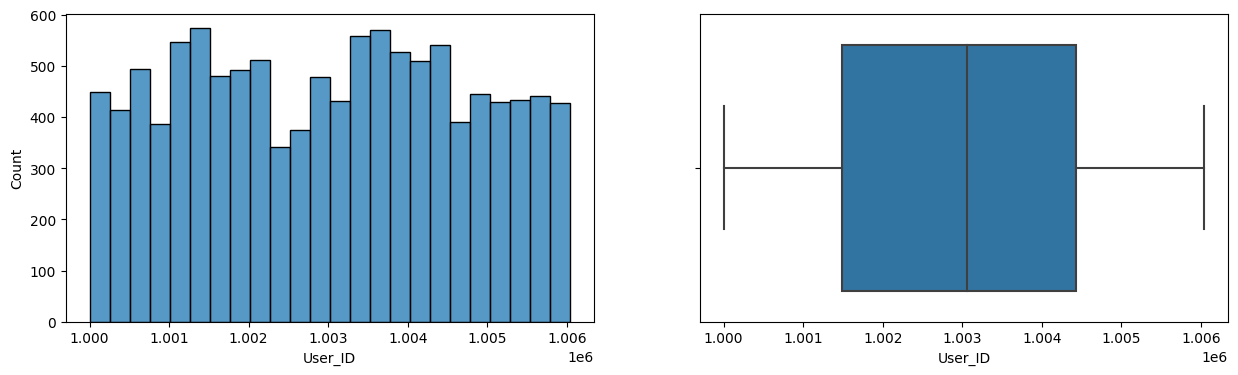

Age


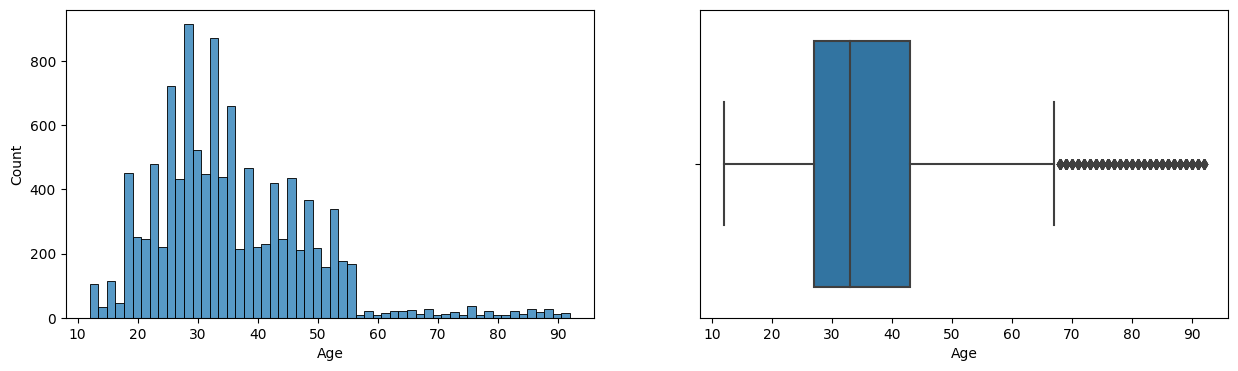

Marital_Status


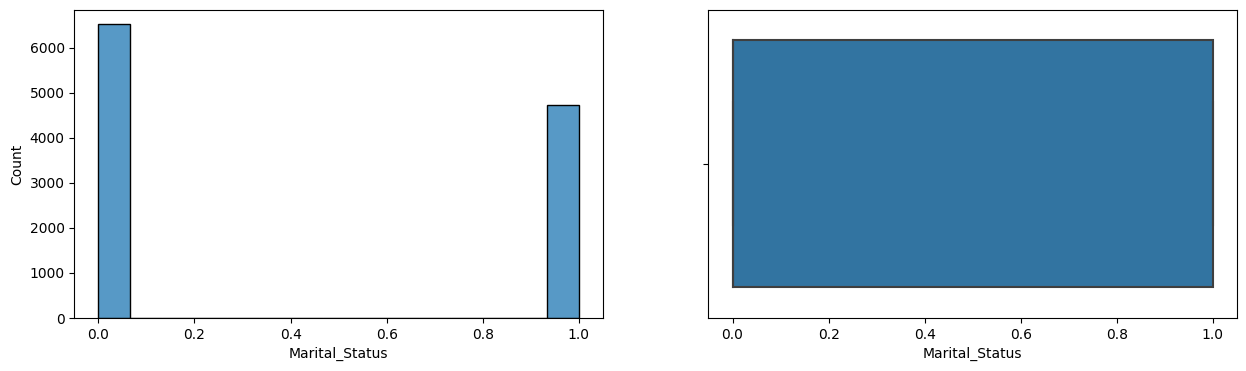

Orders


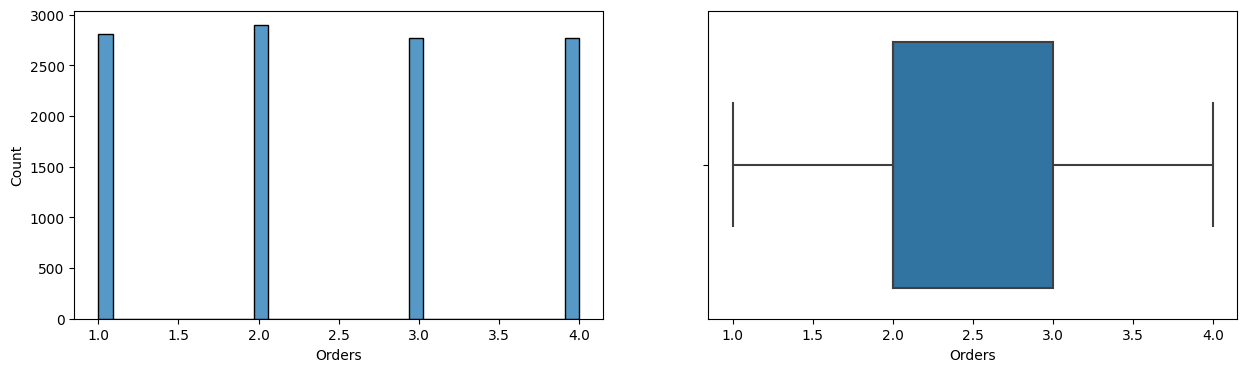

Amount


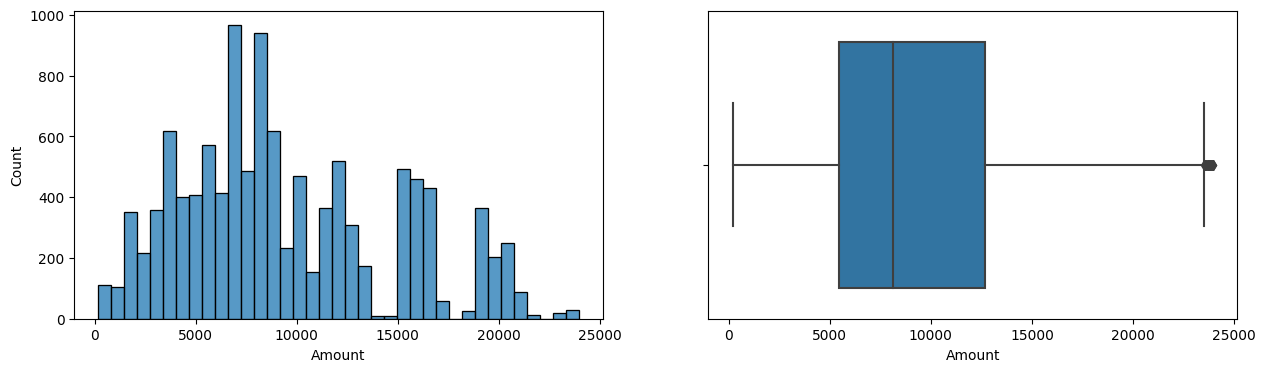

In [46]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    
    plt.show()

Age and Amount has outliers it get can be ignored.

categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price

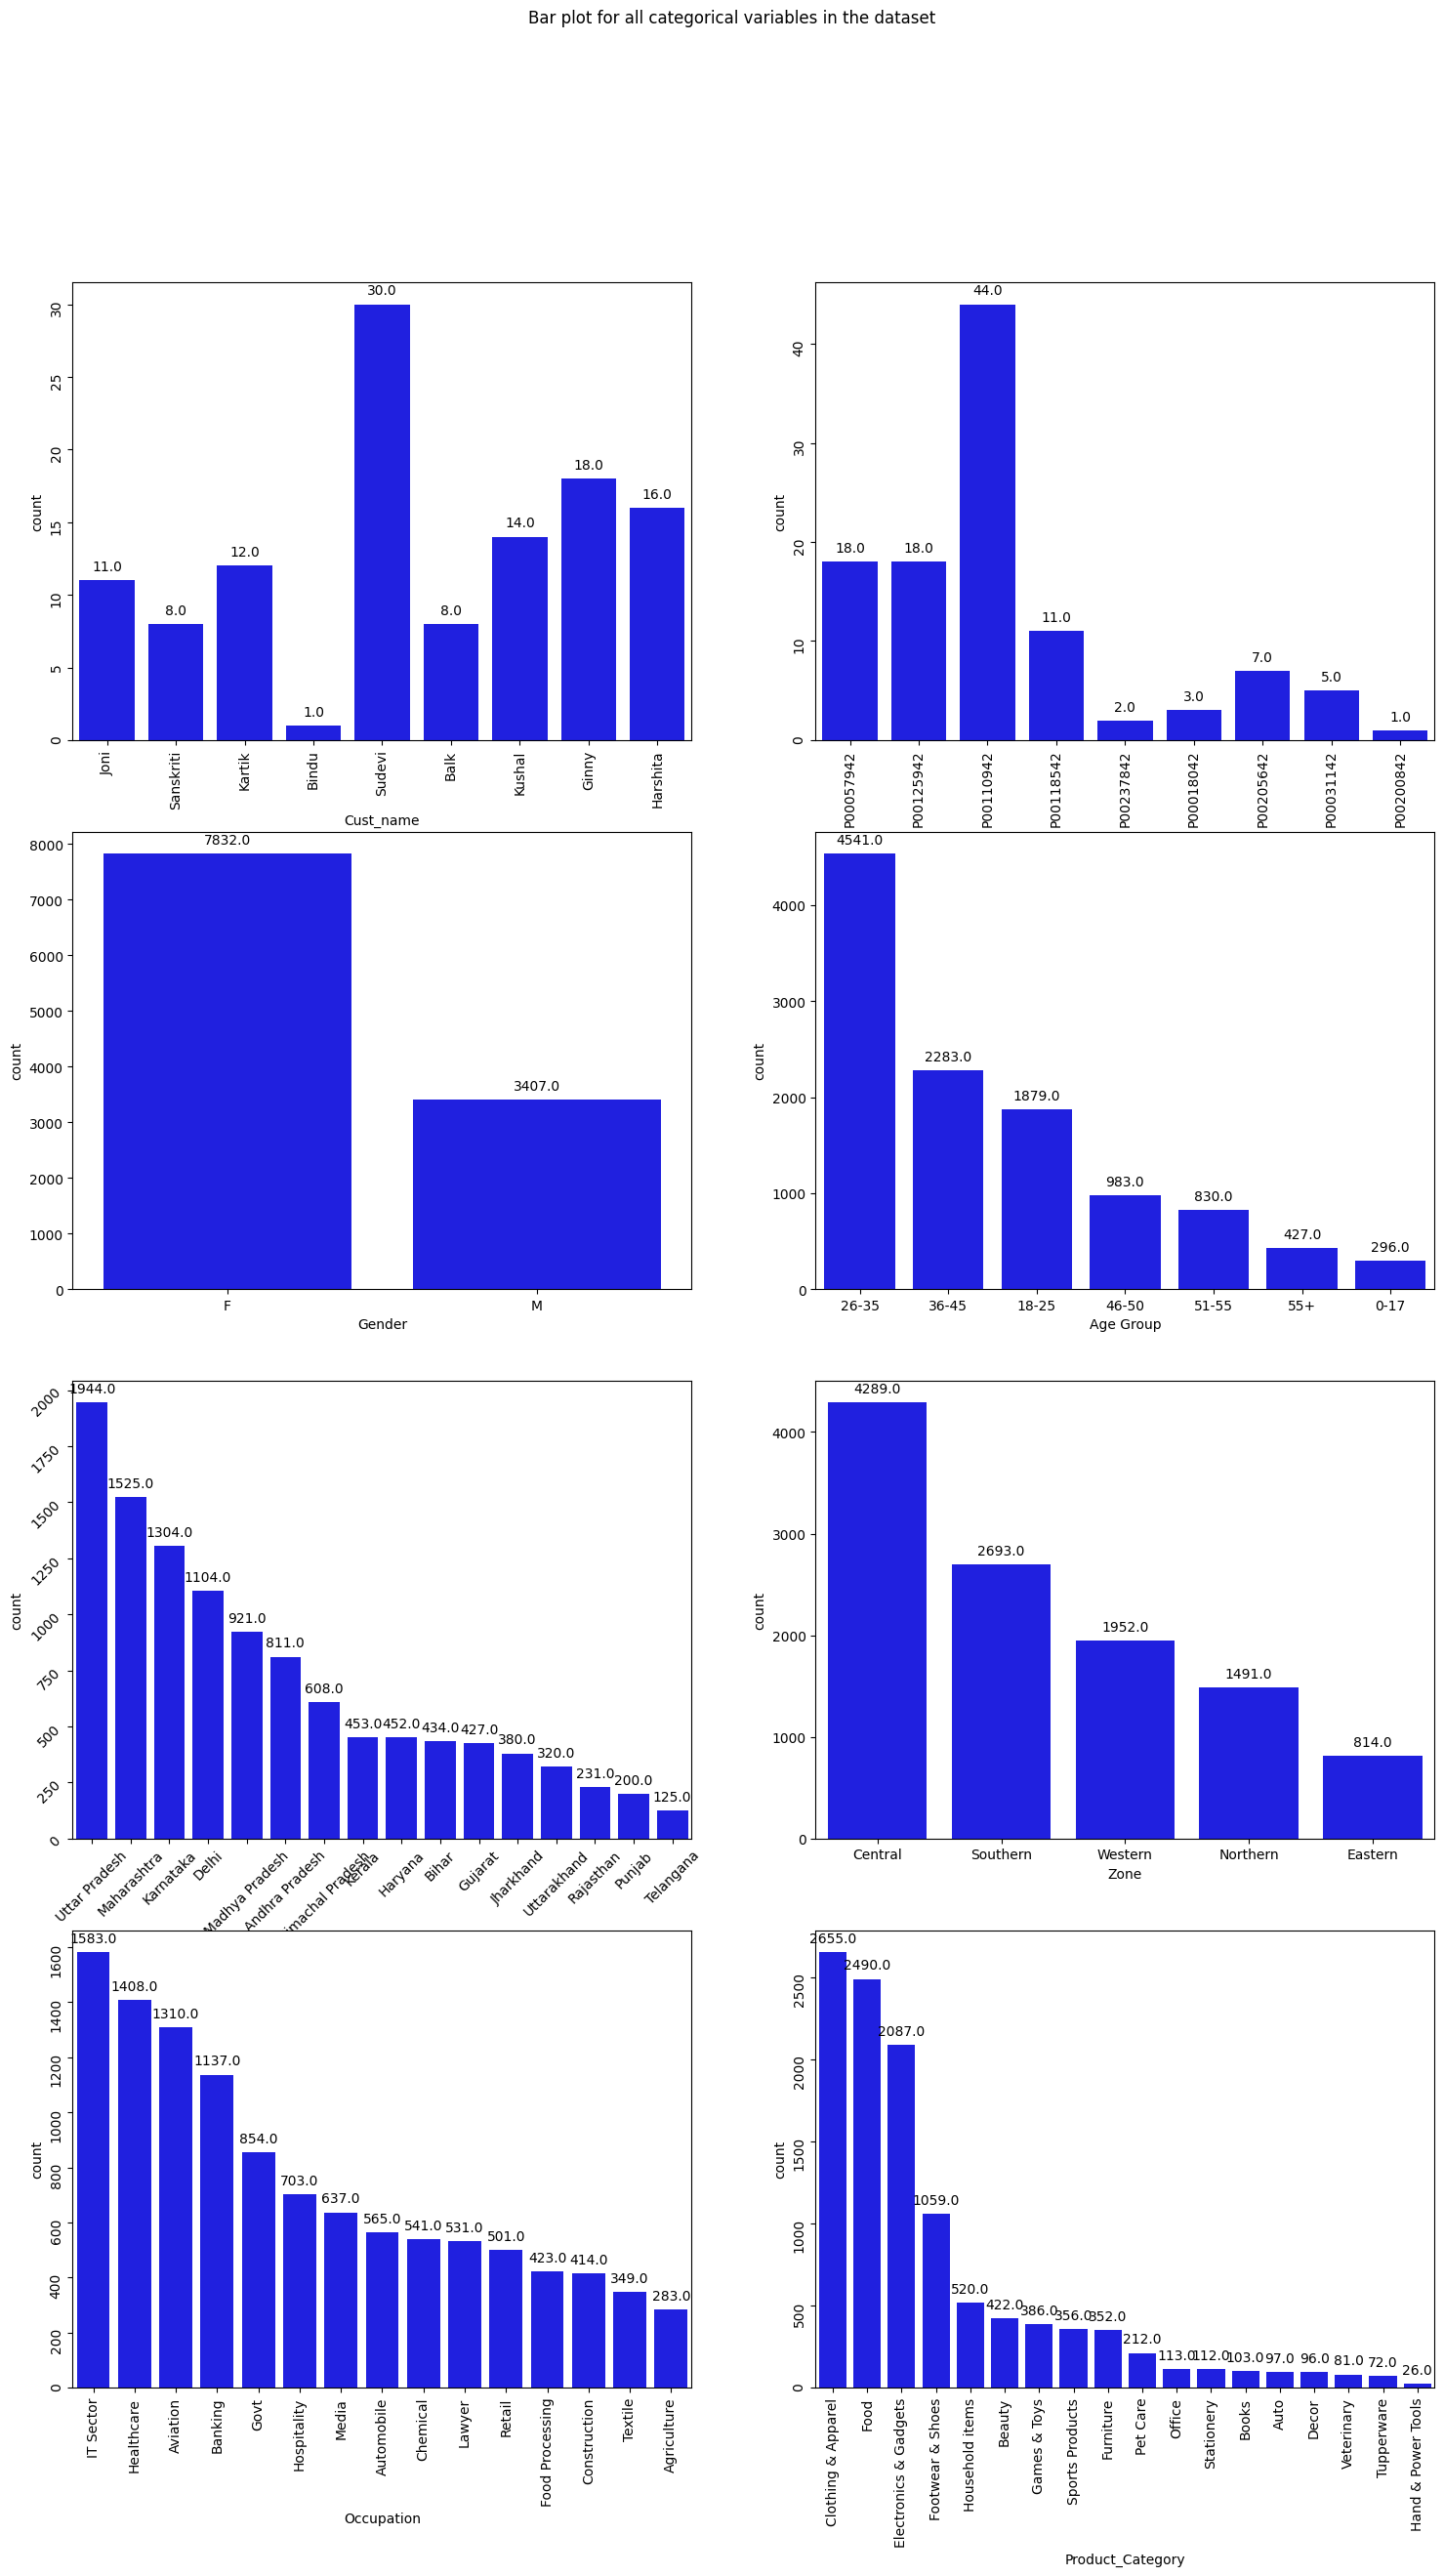

In [47]:
fig, axes = plt.subplots(4, 2, figsize = (18, 24))

fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'Cust_name', data = df, color = 'blue', order = df['Cust_name'].head(10).value_counts().index)

sns.countplot(ax = axes[0, 1], x = 'Product_ID', data = df, color = 'blue', order = df['Product_ID'].head(10).value_counts().index)

sns.countplot(ax = axes[1, 0], x = 'Gender', data = df, color = 'blue',  order = df['Gender'].value_counts().index)

sns.countplot(ax = axes[1, 1], x = 'Age Group', data = df, color = 'blue',  order = df['Age Group'].value_counts().index)

sns.countplot(ax = axes[2, 0], x = 'State', data = df, color = 'blue', order = df['State'].value_counts().index)

sns.countplot(ax = axes[2, 1], x = 'Zone', data = df, color = 'blue', order = df['Zone'].value_counts().index)

sns.countplot(ax = axes[3, 0], x = 'Occupation', data = df, color = 'blue', order = df['Occupation'].value_counts().index)

sns.countplot(ax = axes[3, 1], x = 'Product_Category', data = df, color = 'blue', order = df['Product_Category'].value_counts().index)

for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

axes[0][0].tick_params(labelrotation=90)
axes[0][1].tick_params(labelrotation=90)
axes[2][0].tick_params(labelrotation=45)
axes[3][0].tick_params(labelrotation=90)
axes[3][1].tick_params(labelrotation=90)

From the count plot, we can have below observations
- Sudevi has customer who Purchased most in the Diwali
- "P00110942" this product id has sold the most
- in the Gender category female are purchased high
- Uttarpradesh and Maharashtra has a hishest sales in Diwali 
- in the Zone wise central 
- inproduct category clothing and food has sold thn most

### **Step 8: EDA Bivariate Analysis**

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

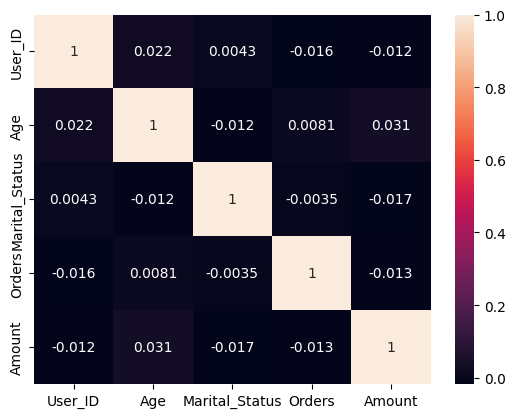

In [48]:
corr = df[['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [50]:
search_title = "P00000142"

# Perform the search
result = df[df['Product_ID'].str.contains(search_title, case=False)]

# Display the result
print(result)

       User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
155    1002994     Hemant  P00000142      F     36-45   42               0   
366    1005857     Shweta  P00000142      M     46-50   50               0   
1152   1003232    Pauline  P00000142      F     36-45   43               1   
1879   1005264    Barbara  P00000142      F     18-25   22               0   
1904   1002799     Adrian  P00000142      F     18-25   19               1   
1968   1004840     Kinney  P00000142      M     46-50   50               0   
2104   1003777     Trupti  P00000142      F     18-25   23               0   
2150   1000623    McGrath  P00000142      F     26-35   30               0   
2469   1001076  Armstrong  P00000142      M     26-35   34               1   
3235   1003823     Denise  P00000142      F       55+   78               0   
4176   1003259     Wardle  P00000142      M     18-25   18               0   
5874   1002085  Siddharth  P00000142      F     18-25   24      

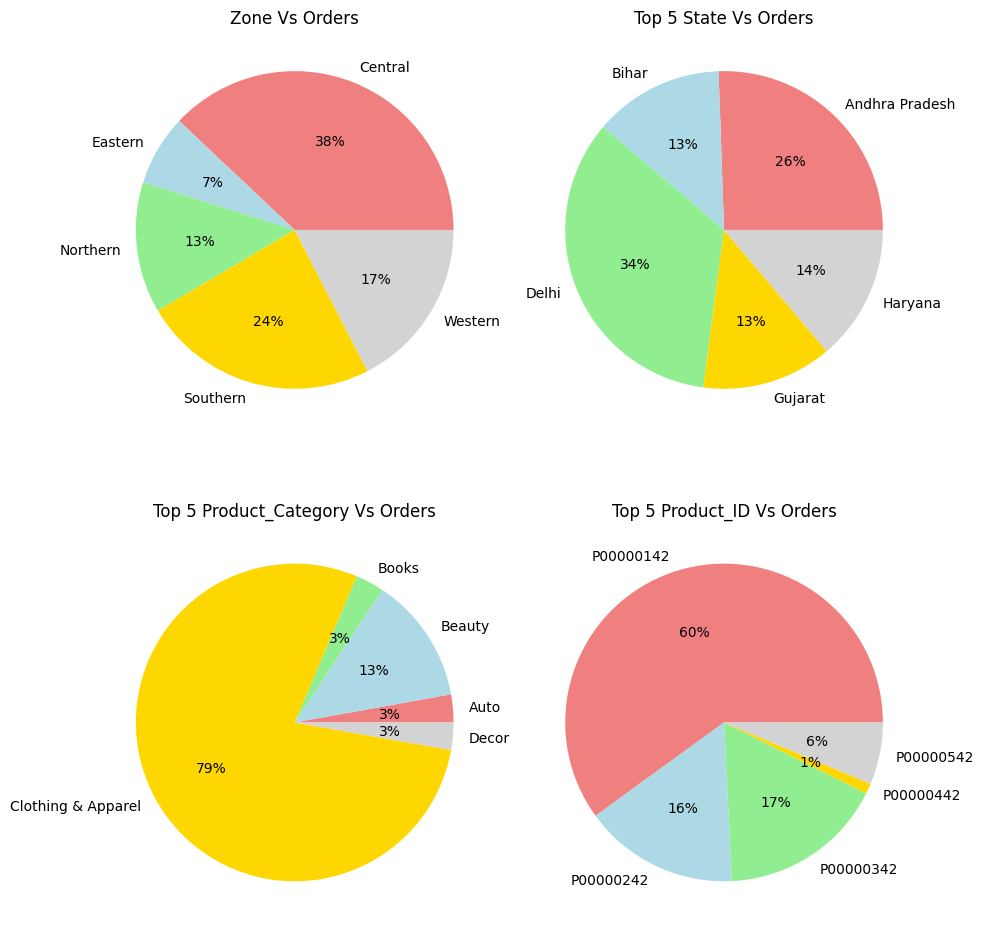

In [51]:
# Calculate the total amount for each category
total_amount_zone = df.groupby('Zone')['Orders'].sum()
total_amount_orders = df.groupby('State')['Orders'].sum().head()
total_amount_age_group = df.groupby('Product_Category')['Orders'].sum().head()
total_amount_gender = df.groupby('Product_ID')['Orders'].sum().head()

# Create a new figure for the pie chart
plt.figure(figsize=(10, 10))

# Plotting pie chart for Zone Vs Price
plt.subplot(2, 2, 1)
plt.pie(total_amount_zone, labels=total_amount_zone.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightgray'])
plt.title("Zone Vs Orders")

# Plotting pie chart for Orders Vs Price
plt.subplot(2, 2, 2)
plt.pie(total_amount_orders, labels=total_amount_orders.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightgray'])
plt.title("Top 5 State Vs Orders")

# Plotting pie chart for Age Group Vs Price
plt.subplot(2, 2, 3)
plt.pie(total_amount_age_group, labels=total_amount_age_group.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightgray'])
plt.title("Top 5 Product_Category Vs Orders")

# Plotting pie chart for Gender Vs Price
plt.subplot(2, 2, 4)
plt.pie(total_amount_gender, labels=total_amount_gender.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightgray'])
plt.title("Top 5 Product_ID Vs Orders")

plt.tight_layout()
plt.show()

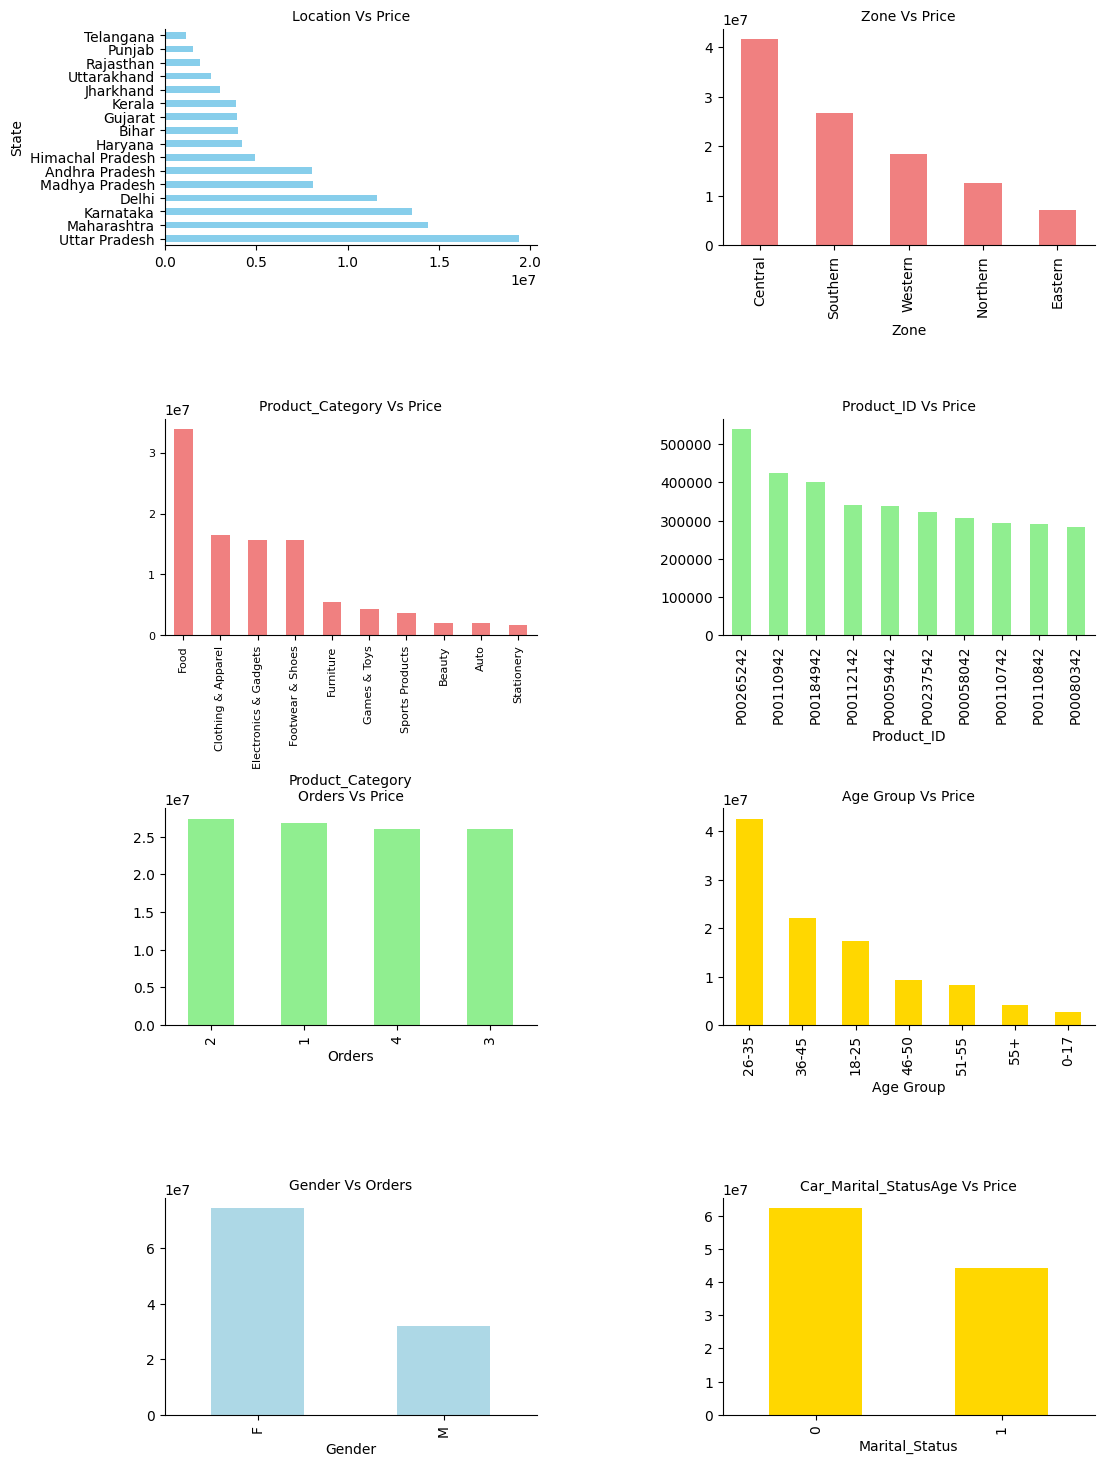

**State-wise Analysis:**

Himachal Pradesh, Uttarakhand, Andhra Pradesh, Kerala, and Jharkhand have the highest average number of orders during Diwali.

**Zone-wise Analysis:**

The 39% of Southern zone leads in terms of the total amount of sales during Diwali, followed by Central, Western, Eastern, and Northern zones.

**Product Category Analysis:**

The top-selling product categories during Diwali are Auto, Tupperware, Hand & Power Tools, Furniture, and Stationery based on the total amount of sales.

**Product ID Analysis:**

Products with IDs like P00240542, P00340642, P0009842, P00122742, and P00281542 have consistently high average orders during Diwali.

**Orders Analysis:**

The order frequency analysis shows that the highest total amount is generated from orders with 2 items has a 26%, followed by orders with 1, 4, and 3 items. This suggests that customers tend to purchase more items in a single order during Diwali.

**Age Group Analysis:**

Customers in the age group has 40% of 26-35 contribute significantly to Diwali sales, followed by customers in the age groups 36-45, 18-25, 46-50, and 51-55.

**Gender and Marital Status Analysis:**

41% of Female customers with a marital status of 0 (single) contribute the most to Diwali sales, followed by Female customers with a marital status of 1, Male customers with a marital status of 0, and Male customers with a marital status of 1.

## **Conclusion:**

- Regional Impact: Diwali sales are particularly strong in states like Himachal Pradesh, Uttarakhand, Andhra Pradesh, Kerala, and Jharkhand. This information can help in targeting marketing efforts more effectively.

- Zone-wise Strategy: Focus on promotional activities and inventory planning in the Southern zone, as it leads in total sales during Diwali.

- Product Focus: Prioritize marketing and stock levels for products in the Auto, Tupperware, Hand & Power Tools, Furniture, and Stationery categories, as they are the top performers.

- Product ID Insights: Products with IDs like P00240542, P00340642, P0009842, P00122742, and P00281542 have consistently high demand, and efforts should be made to promote and maintain their availability.

- Order Frequency Strategy: Encourage customers to purchase more items in a single order by offering bundled deals or discounts for multiple items.

- Age Group Targeting: Target marketing campaigns towards customers in the 26-35 age group, as they contribute significantly to Diwali sales.

- Gender and Marital Status Targeting: Focus on single females, as they contribute the most to Diwali sales. Consider targeted promotions for different gender and marital status segments.